In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
n = 200
m = 5
N = 100
runs = 200
d = [30,40,15,10,5]
com = np.zeros(N)
pop = np.arange(N)
v = 0
idx = 0
for i in d:
  com[idx:(idx+i)] = v
  idx += i
  v += 1

In [0]:
def unique_sampling(pop,com,m,n):
  dist_samp = []
  for i in range(m):
    dist_samp.append([])
  mean = np.zeros(m)
  for i in range(n):
    person = np.random.choice(pop,1)
    community = com[person]
    if person in np.array(dist_samp[int(community)]):
      continue
    else:
      dist_samp[int(community)].append(person)
      mean[int(community)] +=1
  return mean

In [0]:
def regular_sampling(pop,com,m,n):
  mean = np.zeros(m)
  for i in range(n):
    person = np.random.choice(pop,1)
    community = com[person]
    mean[int(community)] +=1
  return mean

In [0]:
error_dist = []
error_reg = []
samps = []
for i in range(N):
  n = N+i*10
  samps.append(n)
  error_d = 0
  error_r = 0
  for jk in range(runs):
    mean_d = unique_sampling(pop,com,m,n)
    mean_r = regular_sampling(pop,com,m,n)
    if not(np.argmax(mean_d) == d.index(max(d))):
      error_d += 1
    if not(np.argmax(mean_r) == d.index(max(d))):
      error_r += 1
    # print(np.argmax(mean))
  error_dist.append(error_d/runs)
  error_reg.append(error_r/runs)



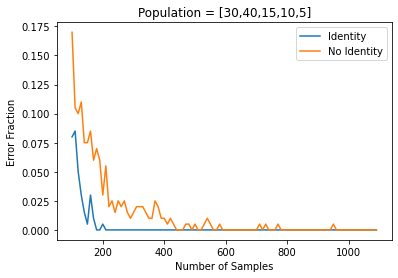

In [22]:
from google.colab import files
plt.figure()
plt.plot(samps,error_dist)
plt.plot(samps,error_reg)
plt.legend(['Identity','No Identity'])
plt.title('Population = [30,40,15,10,5]')
plt.xlabel("Number of Samples")
plt.ylabel("Error Fraction")
plt.savefig("distinct_sampling.jpg")
files.download("distinct_sampling.jpg")
plt.show()